In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Matplotlib is building the font cache; this may take a moment.


In [2]:
path = r'/Users/thomaskimber/Desktop/Instacart Basket Analysis'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_4.8.1.pkl'))

In [7]:
ords_prods_merge.shape

(32404859, 24)

In [37]:
ords_prods_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 24 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   product_id                 int64   
 1   product_name               object  
 2   aisle_id                   int64   
 3   department_id              int64   
 4   prices                     float64 
 5   order_id                   int64   
 6   user_id                    int64   
 7   order_number               int64   
 8   orders_day_of_week         int64   
 9   hour_of_the_day_for_order  int64   
 10  days_since_prior_order     float64 
 11  add_to_cart_order          int64   
 12  reordered                  int64   
 13  _merge                     category
 14  price_range_loc            object  
 15  busiest_days               object  
 16  busiest_period_of_day      object  
 17  max_order                  int64   
 18  loyalty_flag               object  
 19  avg_price_x        

<Axes: xlabel='orders_day_of_week'>

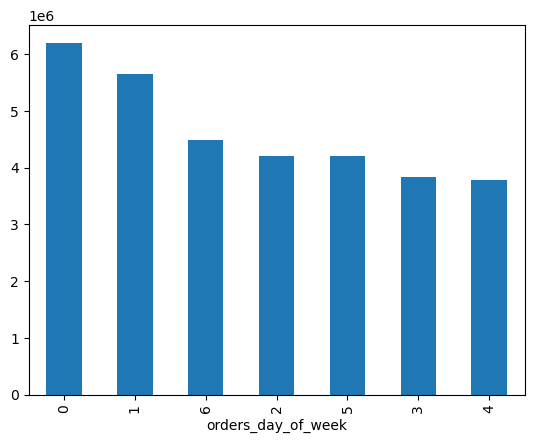

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

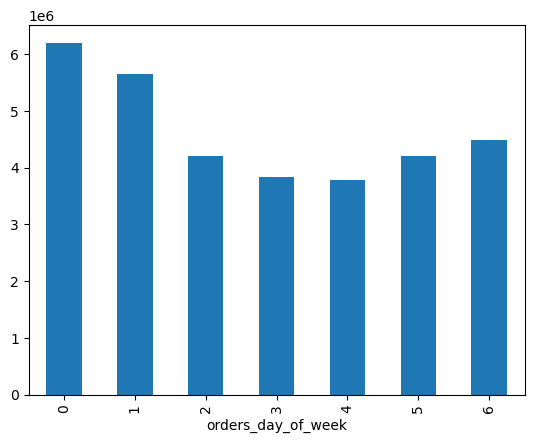

In [9]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

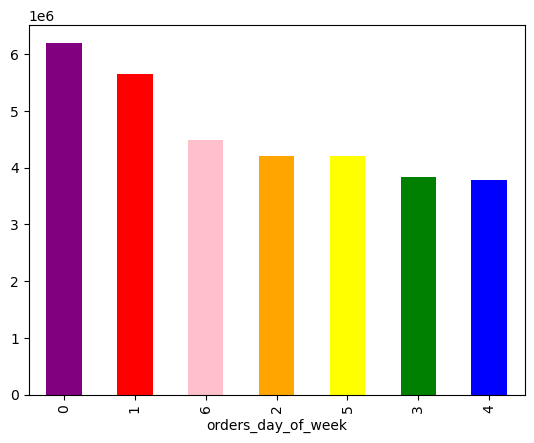

In [10]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [15]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

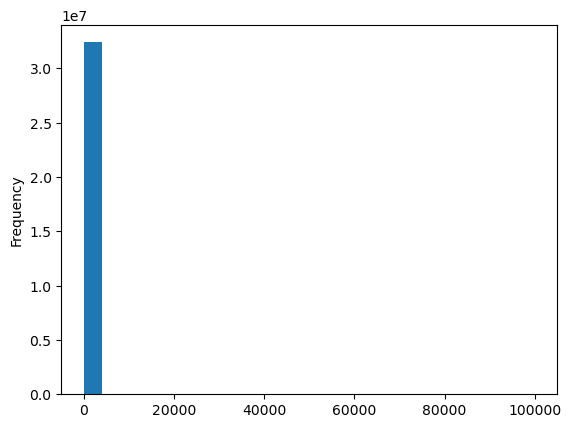

In [16]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

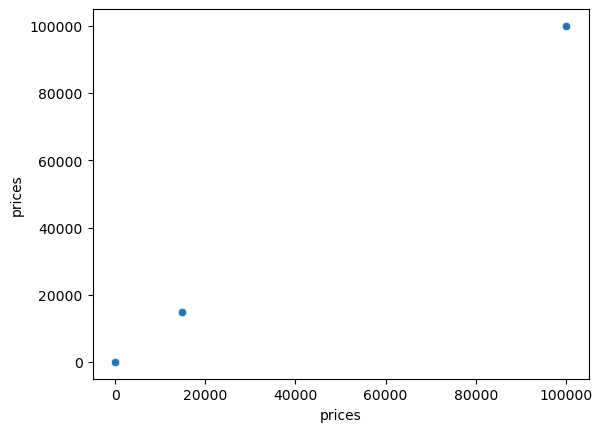

In [17]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [18]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_the_day_for_order,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_x,spending_flag,avg_price_y,median_days,order_frequency_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,108.648299,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,108.648299,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,1154.792308,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,1154.792308,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,114.426619,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,1106.743956,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,1106.743956,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Least busiest days,Most orders,15,Regular customer,451.153540,High spender,451.153540,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Least busiest days,Average orders,12,Regular customer,1178.381871,High spender,1178.381871,12.0,Regular customer


In [19]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [22]:
ords_prods_merge['prices'].max()

25.0

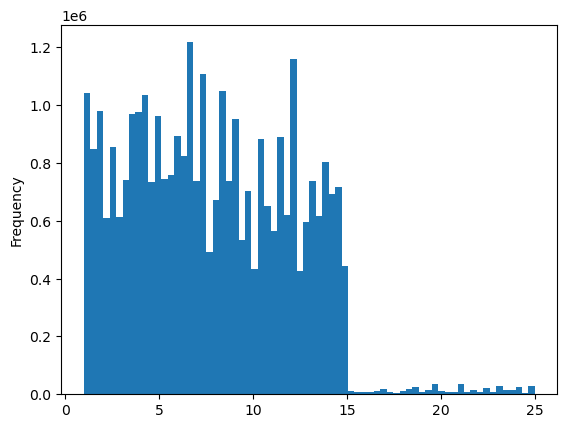

In [25]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [26]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'hist_price.png'))

In [27]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [28]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [29]:
np. random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [30]:
big = ords_prods_merge[dev]

In [31]:
small = ords_prods_merge [~dev]

In [32]:
len (ords_prods_merge)

32404859

In [33]:
len (big) + len(small)

32404859

In [34]:
df_2 = small[['orders_day_of_week','prices']]

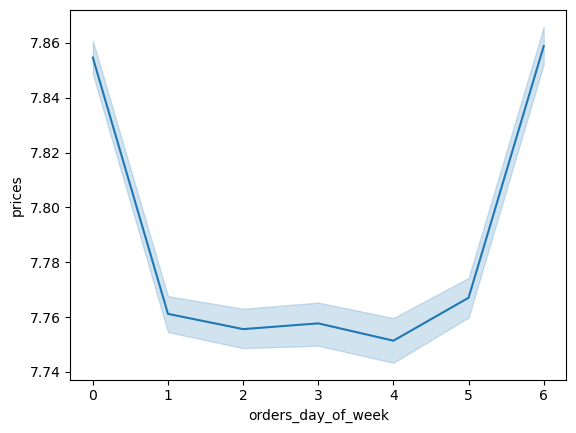

In [35]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [36]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'line_price_DOW.png'))